In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
encoded_data = pd.read_csv('DATA/CAE2_eeg_data.csv')

# Load the original EEG data to retrieve labels
eeg_data = pd.read_csv('DATA/RAW_eeg_data.csv')
eeg_labels = eeg_data['Condition']

# Ensure the number of samples in encoded_data matches the number of labels
assert len(encoded_data) == len(eeg_labels), "Mismatch between encoded data and labels!"


Divide the data into 30% test and 70% train 

In [3]:
y = (eeg_data['Condition'] == 'AD').astype(int)
# Split the data into training and testing sets
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(encoded_data, y, test_size=0.3, random_state=3)

Decision Tree

In [4]:
# Initialize and train Decision Tree
dt = DecisionTreeClassifier(random_state=3)
dt.fit(X_train_encoded, y_train)

DecisionTreeClassifier(random_state=3)

Evaluation Decision Tree

In [5]:
train_score_dt = dt.score(X_train_encoded, y_train)
test_score_dt = dt.score(X_test_encoded, y_test)
print('Decision Tree Train score:', train_score_dt)
print('Decision Tree Test score:', test_score_dt)

Decision Tree Train score: 1.0
Decision Tree Test score: 0.7090909090909091


Plot Decision Tree

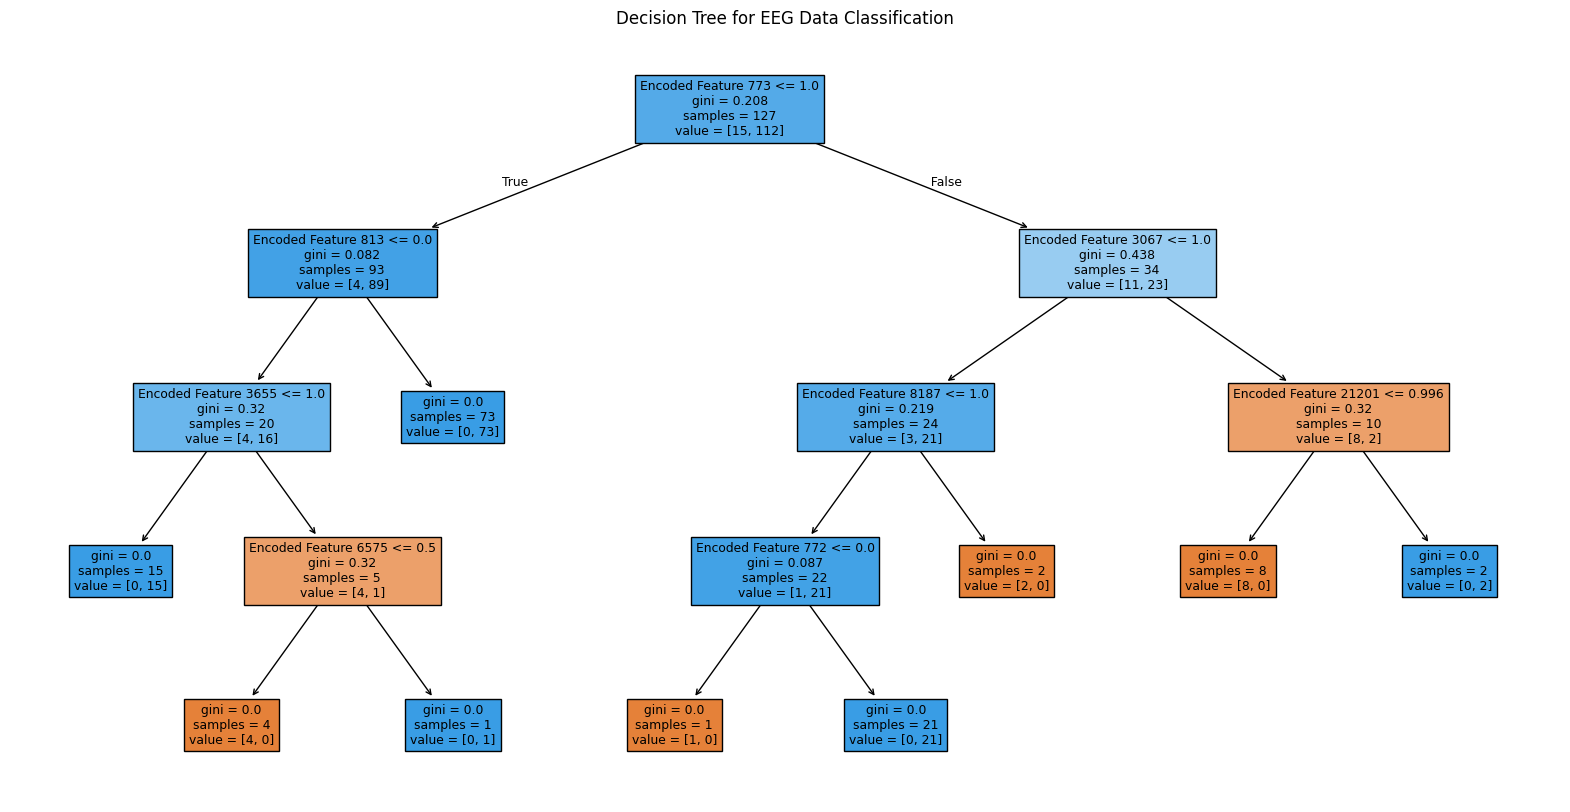

In [6]:
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=[f'Encoded Feature {i}' for i in range(X_train_encoded.shape[1])])
plt.title("Decision Tree for EEG Data Classification")
plt.show()

Hyperparameter Tuning for Decision Tree

In [7]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 11)
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid_dt, cv=5)
grid_dt.fit(X_train_encoded, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 11)})

In [8]:
print("Best hyperparameters for Decision Tree:", grid_dt.best_params_)
print("Best Score: {:.2f}".format(grid_dt.best_score_))

Best hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': 1}
Best Score: 0.88


Use best hyperparameters to retrain Decision Tree


In [30]:
best_dt = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=3)
best_dt.fit(X_train_encoded, y_train)
print('Optimized Decision Tree Test score:', best_dt.score(X_test_encoded, y_test))

Optimized Decision Tree Test score: 0.8727272727272727


Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=3)
rf.fit(X_train_encoded, y_train)

RandomForestClassifier(random_state=3)

Evaluation of random forest     

In [11]:
train_score_rf = rf.score(X_train_encoded, y_train)
test_score_rf = rf.score(X_test_encoded, y_test)
print('Random Forest Train score:', train_score_rf)
print('Random Forest Test score:', test_score_rf)

Random Forest Train score: 1.0
Random Forest Test score: 0.8727272727272727


Confusion Matrix for Random Forest

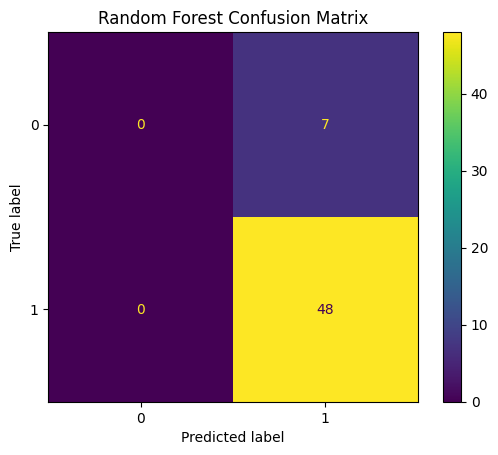

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_rf = rf.predict(X_test_encoded)
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

Hyperparams Tuning 

In [13]:
param_grid_rf = {
    'n_estimators': range(10, 90, 10),
    'max_depth': range(1, 11),
    'criterion': ['gini', 'entropy']
}   
grid_rf = GridSearchCV(RandomForestClassifier(random_state=3), param_grid_rf, cv=5)
grid_rf.fit(X_train_encoded, y_train)

E:\Python\HomeWorkDM\.venv\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 11),
                         'n_estimators': range(10, 90, 10)})

In [14]:

print("Best hyperparameters for Random Forest:", grid_rf.best_params_)
print("Best Score: {:.2f}".format(grid_rf.best_score_))

Best hyperparameters for Random Forest: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 10}
Best Score: 0.89


Use those best hyperparams in another random forest 

In [15]:
best_rf = RandomForestClassifier(criterion=grid_rf.best_params_['criterion'], max_depth=grid_rf.best_params_['max_depth'], n_estimators=grid_rf.best_params_['n_estimators'], random_state=3)
best_rf.fit(X_train_encoded, y_train)
print('Optimized Random Forest Test score:', best_rf.score(X_test_encoded, y_test))

Optimized Random Forest Test score: 0.8545454545454545


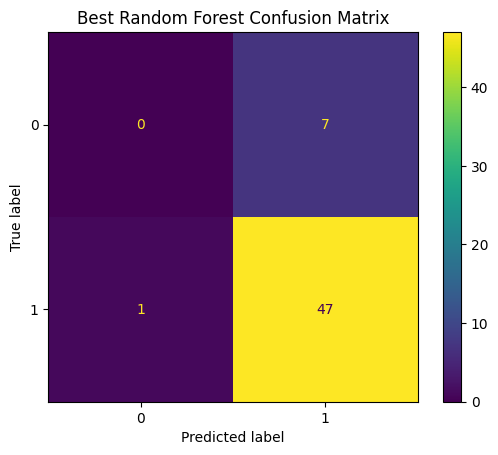

In [16]:
y_pred_best_rf = best_rf.predict(X_test_encoded)
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
disp_best_rf = ConfusionMatrixDisplay(confusion_matrix=cm_best_rf)
disp_best_rf.plot()
plt.title("Best Random Forest Confusion Matrix")
plt.show()

Support Vector Machine

In [17]:

from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', gamma='auto')
svm_model.fit(X_train_encoded, y_train)


SVC(gamma='auto')

In [18]:
# Evaluate SVM
svm_test_score = svm_model.score(X_test_encoded, y_test)
svm_train_score = svm_model.score(X_train_encoded, y_train)
print('SVM Test score:', svm_test_score)
print('SVM Train score:', svm_train_score)


SVM Test score: 0.8727272727272727
SVM Train score: 0.8818897637795275


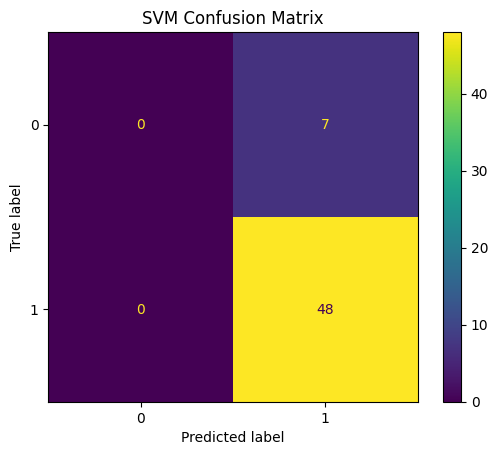

In [19]:
# Confusion Matrix for SVM
y_pred_svm = svm_model.predict(X_test_encoded)
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot()
plt.title('SVM Confusion Matrix')
plt.show()


In [20]:
# Hyperparameter Tuning for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}
grid_search_svm = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search_svm.fit(X_train_encoded, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear']},
             verbose=1)

In [21]:
print("Best hyperparameters found by GridSearchCV:", grid_search_svm.best_params_)
print("Best Score found by GridSearchCV:", grid_search_svm.best_score_)


Best hyperparameters found by GridSearchCV: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score found by GridSearchCV: 0.8818461538461537


In [22]:
# Use best hyperparameters to retrain SVM
best_svm_model = grid_search_svm.best_estimator_
svm_test_score = best_svm_model.score(X_test_encoded, y_test)
svm_train_score = best_svm_model.score(X_train_encoded, y_train)
print('Optimized SVM Test score:', svm_test_score)
print('Optimized SVM Train score:', svm_train_score)


Optimized SVM Test score: 0.8727272727272727
Optimized SVM Train score: 0.8818897637795275


K-Nearest Neighbors (KNN)

In [23]:

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(weights='distance', algorithm='auto', metric='manhattan')
knn_model.fit(X_train_encoded, y_train)


KNeighborsClassifier(metric='manhattan', weights='distance')

In [24]:
# Evaluate KNN
knn_test_score = knn_model.score(X_test_encoded, y_test)
knn_train_score = knn_model.score(X_train_encoded, y_train)
print('KNN Test score:', knn_test_score)
print('KNN Train score:', knn_train_score)


KNN Test score: 0.9636363636363636
KNN Train score: 1.0


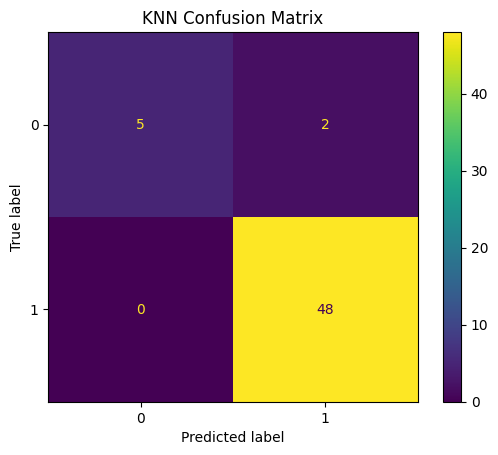

In [25]:
# Confusion Matrix for KNN
y_pred_knn = knn_model.predict(X_test_encoded)
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
plt.title('KNN Confusion Matrix')
plt.show()


In [26]:
# Hyperparameter Tuning for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, verbose=1, n_jobs=-1)
grid_search_knn.fit(X_train_encoded, y_train)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [27]:
print("Best hyperparameters found by GridSearchCV for KNN:", grid_search_knn.best_params_)
print("Best Score found by GridSearchCV for KNN:", grid_search_knn.best_score_)


Best hyperparameters found by GridSearchCV for KNN: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best Score found by GridSearchCV for KNN: 0.9686153846153847


In [28]:
# Use best hyperparameters to retrain KNN
best_knn_model = grid_search_knn.best_estimator_
knn_test_score = best_knn_model.score(X_test_encoded, y_test)
knn_train_score = best_knn_model.score(X_train_encoded, y_train)
print('Optimized KNN Test score:', knn_test_score)
print('Optimized KNN Train score:', knn_train_score)


Optimized KNN Test score: 0.9636363636363636
Optimized KNN Train score: 0.9921259842519685


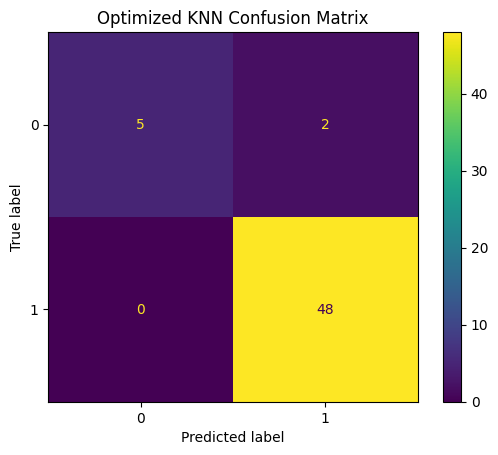

In [29]:
# Confusion Matrix for optimized KNN
y_pred_knn = best_knn_model.predict(X_test_encoded)
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
plt.title('Optimized KNN Confusion Matrix')
plt.show()
